# A Primer in Econometric Theory

* [John Stachurski](http://johnstachurski.net/index.html)

## Tuning via cross validation

Cross validation to tune the ridge regression parameter.  A simulation from chapter 13.


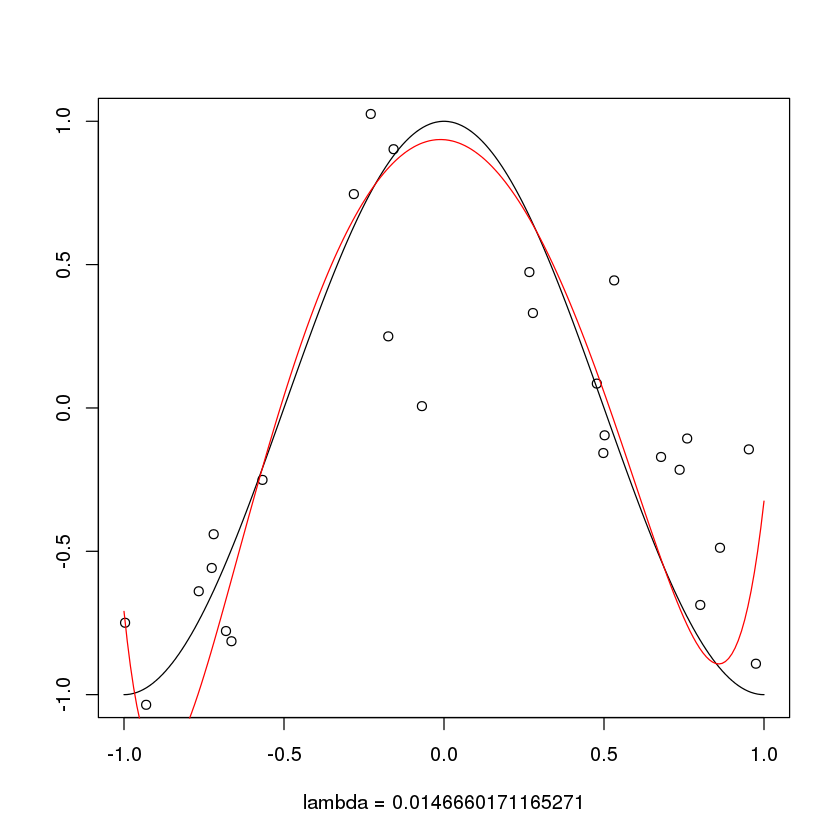

In [2]:

# The true model is y = f^*(x) + u where u is normal with zero
# mean and standard deviation sigma, and f^* is as below.  The
# variable x is drawn IID from U[-1,1]
sigma <- 0.5
fstar <- function(x) return(cos(pi * x))

# Function to generate n input/output pairs
sample_pairs <- function(n) {  
    inputs <- runif(n, min=-1, max=1)
    shocks <- sigma * rnorm(n)
    outputs <- fstar(inputs) + shocks
    return(list(x=inputs, y=outputs))
}

# Map vector x_i into matrix x_i^j where j=0,...,d
Phi <- function(x, d) {
    n <- length(x)
    P <- matrix(nrow=n, ncol=(d+1))
    for (i in 1:n) P[i,] <- x[i]^(0:d)
    return(P)
}
    

# Vectorized polynomial function
polynom <- function(xvec, coefficients) {
    D <- length(coefficients) - 1  # Degree of polynomial
    return(Phi(xvec, D) %*% coefficients)
}


N <- 35
set.seed(1111)
data <- sample_pairs(N)  # Observed data

K <- 14  # Degree of polynomial
lambda <- exp(seq(-22, 10, length=10))
M <- length(lambda)
error_sum <- rep(0, M)
for (m in 1:M) {
    for (n in 1:N) {
        x <- data$x[-n]
        y <- data$y[-n]
        Phimat <- Phi(x, K)
        A <- t(Phimat) %*% Phimat + lambda[m] * diag(K+1)
        b <- t(Phimat) %*% y
        gammahat <- solve(A,b)  # A^{-1} b
        error <- (data$y[n] - sum(gammahat * (data$x[n]^(0:K))))^2
        error_sum[m] <- error_sum[m] + error
    }
}

m <- which.min(error_sum)
Phimat <- Phi(data$x, K)
A <- t(Phimat) %*% Phimat + lambda[m] * diag(K+1)
b <- t(Phimat) %*% data$y
gammahat <- solve(A,b)  # A^{-1} b
grid_size <- 200; xmin <- -1; xmax <- 1
x_grid <- seq(xmin, xmax, length=grid_size)
plot(x_grid, cos(pi * x_grid), type="l", 
    xlab=paste("lambda =", lambda[m]), ylab="", main="")
points(data$x, data$y)
lines(x_grid, polynom(x_grid, gammahat), col="red")

